<a href="https://colab.research.google.com/github/aishwamurali/aishwamurali/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>Author: Aishwarya Muralidharan Nair
<br>CWID: 20015437
<br>AAI 627 HW4
<br>Date: 09/29/2022
<br>Dataset: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset#

The dataset conatins data pertaining to two types of raisins and their features.

Attribute Information:
1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

Applying kNN to classify the raisins into Kecimen or Besni class based on given attributes.

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns

Importing data from drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Raisin_Dataset.csv")

Mounted at /content/drive


In [3]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data['Class'].describe()

count         900
unique          2
top       Kecimen
freq          450
Name: Class, dtype: object

Visualizing the dataset with respect to the target values in Class

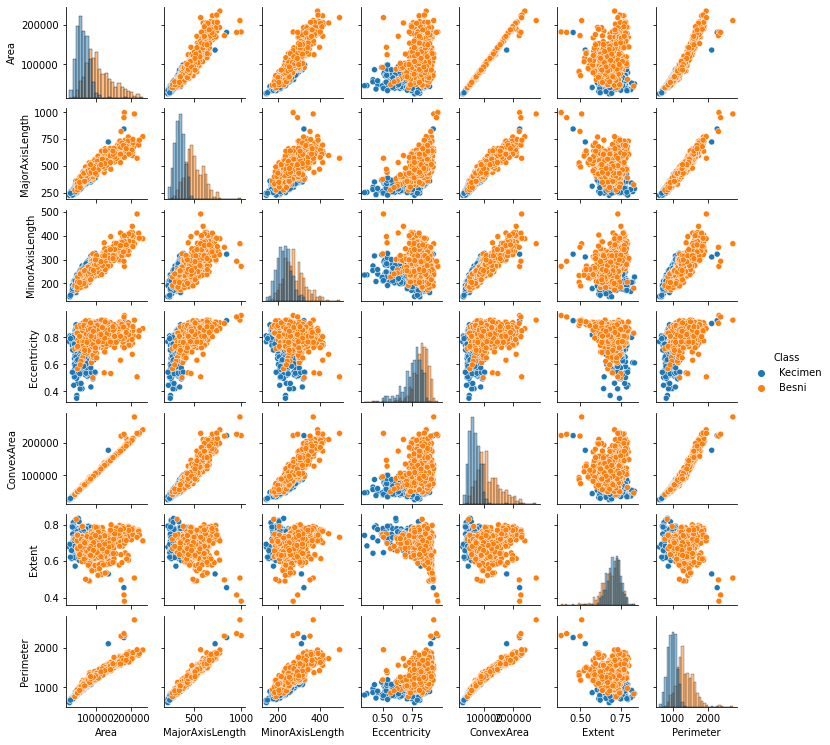

In [6]:
sns.pairplot(data, hue = 'Class', diag_kind="hist", height = 1.5)

Splitting dataset into training set, target set and testing set

In [7]:
X = data.iloc[:,0:7]
Y = data.iloc[:,7]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)

In [8]:
print('Length of X_train is: \n', len(X_train))
print('Length of X_test is: \n', len(X_test))
print('Length of Y_train is: \n', len(Y_train))
print('Length of Y_test is: \n', len(Y_test))

Length of X_train is: 
 720
Length of X_test is: 
 180
Length of Y_train is: 
 720
Length of Y_test is: 
 180


Calculating the value of k, neighbors, based on square root method

In [9]:
import math as m
m.sqrt(len(X_train))

26.832815729997478

Creating kNN classifier model based on required parameters of neighbors and output

In [10]:
knnmodel = KNeighborsClassifier(n_neighbors = 29, p = 2, metric = 'euclidean')

Fitting the kNN model with the training data

In [11]:
knnmodel.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

Predicting the target value with the testing data

In [12]:
Y_predict = knnmodel.predict(X_test)
len(Y_predict)

180

Confusion Matrix

In [13]:
conf_mat = confusion_matrix(Y_test, Y_predict)
print(conf_mat)

[[65 18]
 [11 86]]


f1 score for each of the varieities

In [14]:
f1_score(Y_test, Y_predict, pos_label="Besni")

0.8176100628930818

In [15]:
f1_score(Y_test, Y_predict, pos_label="Kecimen")

0.8557213930348259

Accuracy of the kNN model

In [16]:
print(accuracy_score(Y_test, Y_predict))

0.8388888888888889


In [17]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

       Besni       0.86      0.78      0.82        83
     Kecimen       0.83      0.89      0.86        97

    accuracy                           0.84       180
   macro avg       0.84      0.83      0.84       180
weighted avg       0.84      0.84      0.84       180



In [18]:
f1score_besni = (2*0.86*0.78)/(0.86+0.78)
f1score_besni

0.8180487804878049

In [19]:
f1score_kecimen = (2*0.83*0.89)/(0.83+0.89)
f1score_kecimen

0.8589534883720931

Scaling the data set using StandardScaler function from sklearn

In [20]:
scaled_X = StandardScaler()
X_train = scaled_X.fit_transform(X_train)
X_test = scaled_X.transform(X_test)

Fitting the kNN model using the newly scaled training values

In [21]:
knnmodel = KNeighborsClassifier(n_neighbors = 29, p = 2, metric = 'euclidean')
knnmodel.fit(X_train, Y_train)
Y_predict = knnmodel.predict(X_test)
len(Y_predict)
conf_mat = confusion_matrix(Y_test, Y_predict)
print(conf_mat)
print("accuracy_score = ",accuracy_score(Y_test, Y_predict))

[[71 12]
 [ 6 91]]
accuracy_score =  0.9


Result now shows an accuracy of 90% which was earlier at 83.8% when trained without scaling the inputs.